### **Regression using numpy (with pandas and pyplot)**

In [ ]:
# Set-up
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Upload all data files - must be on local computer
# Cities.csv, Players.csv
# If running notebook on local computer:
#   No need to run this cell (it will generate an error)
#   Make sure data files are in same workspace as notebook
from google.colab import files
uploaded = files.upload()

Saving Cities.csv to Cities.csv
Saving Players.csv to Players.csv


In [ ]:
# Read Cities.csv into dataframe
f = open('Cities.csv')
cities = pd.read_csv(f)

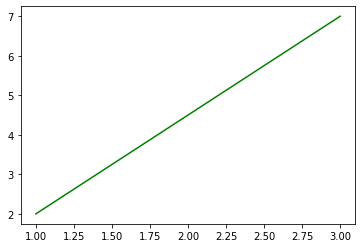

In [ ]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

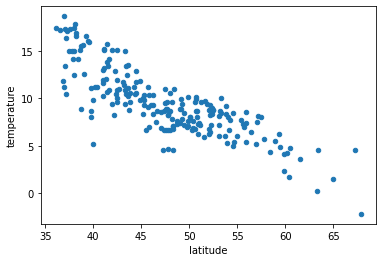

In [ ]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter(x='latitude', y='temperature')
plt.show()

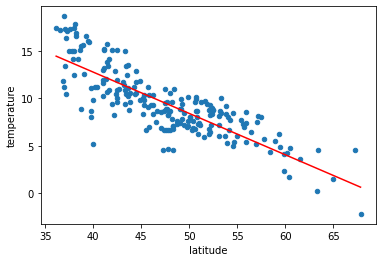

In [ ]:
# Add linear regression
cities.plot.scatter(x='latitude', y='temperature')
a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b
x1 = min(cities.latitude)
x2 = max(cities.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [ ]:
# Correlation coefficients (r values)
r = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', r)
r = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', r)

Correlation coefficient for temperature versus latitude: -0.8241046320267099
Correlation coefficient for temperature versus longitude: -0.16930750403617875


In [ ]:
cities

,city,country,latitude,longitude,temperature
0,Aalborg,Denmark,57.03,9.92,7.52
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
2,Abisko,Sweden,63.35,18.83,0.20
3,Adana,Turkey,36.99,35.32,18.67
4,Albacete,Spain,39.00,-1.87,12.62
...,...,...,...,...,...
208,Yevpatoriya,Ukraine,45.20,33.36,10.02
209,Zaragoza,Spain,41.65,-0.89,14.17
210,Zhytomyr,Ukraine,50.25,28.66,6.67
211,Zonguldak,Turkey,41.43,31.78,10.64


In [ ]:
# Use linear regression for interactive temperature predictor
# Training data: compute latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[(cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')]
a,b = np.polyfit(train.latitude, train.temperature, 1)
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted temperature:', a * float(city.latitude) + b)
        print('Actual temperature:', float(city.temperature))

Enter city name (or "quit" to quit): Albacete
Predicted temperature: 12.087878675526715
Actual temperature: 12.62
Enter city name (or "quit" to quit): Barcelona
Predicted temperature: 11.303579688599967
Actual temperature: 15.78
Enter city name (or "quit" to quit): Madrid
Predicted temperature: 11.62652633027569
Actual temperature: 11.19
Enter city name (or "quit" to quit): Paris
City not in dataset
Enter city name (or "quit" to quit): Quito
City not in dataset
Enter city name (or "quit" to quit): Yolo
City not in dataset
Enter city name (or "quit" to quit): Riobamba
City not in dataset
Enter city name (or "quit" to quit): Cambridge
Predicted temperature: 7.7379851345884525
Actual temperature: 9.25
Enter city name (or "quit" to quit): Oxford
City not in dataset
Enter city name (or "quit" to quit): De francia
City not in dataset
Enter city name (or "quit" to quit): quit


### <font color="green">**Your Turn: World Cup Data**</font>

In [ ]:
# Read Players.csv into dataframe
f = open('Players.csv')
players = pd.read_csv(f)

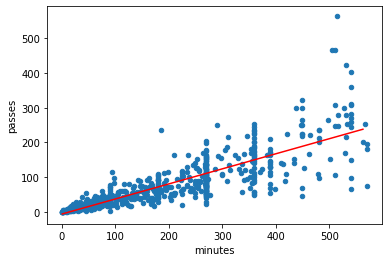

In [ ]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
players.plot.scatter(x='minutes', y='passes')
a,b = np.polyfit(players.minutes, players.passes, 1)
x1 = min(players.minutes)
x2 = max(players.passes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [ ]:
# Show the correlation coefficient for the passes-minutes regression.
# Also show correlation coefficients for tackles versus minutes, shots
# versus minutes, and saves versus minutes
r = np.corrcoef(players.minutes, players.passes)[1,0]
print('Correlation coefficient for passes versus minutes:', r)
r = np.corrcoef(players.minutes, players.tackles)[1,0]
print('Correlation coefficient for tackles versus minutes:', r)
r = np.corrcoef(players.minutes, players.shots)[1,0]
print('Correlation coefficient for shots versus minutes:', r)
r = np.corrcoef(players.minutes, players.saves)[1,0]
print('Correlation coefficient for saves versus minutes:', r)

Correlation coefficient for passes versus minutes: 0.8151193157954871
Correlation coefficient for tackles versus minutes: 0.6106734613835504
Correlation coefficient for shots versus minutes: 0.40792307740541656
Correlation coefficient for saves versus minutes: 0.22847723253087998


In [ ]:
# Use linear regression for interactive number-of-passes predictor.
# The user enters a player's surname; the code finds the number of
# minutes the player played, uses the regression to predict the
# number of passes made, then checks against the actual number.
# Training data: compute minutes-passes regression for players from
# Greece, USA, and Portugal
#
# Once your predictor seems to be working, try players Barry, Gomez, or Pepe.
# You probably get an error; figure out why and modify your code so it prints
# a suitable message instead of raising an error.
train = players[(players.team.isin(['Greece', 'USA', 'Portugal']))]
a,b = np.polyfit(train.minutes, train.passes, 1)
# Loop asking user for surname, compute predicted + actual number-of-passes
while True:
    name = input('Enter player surname (or "quit" to quit): ')
    if name == 'quit': break
    player = players[players.surname == name]
    if len(player) == 0:
        print('Player not in dataset')
    if len(player) > 1:
        print('Player surname must be unique')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted number-of-passes:', a * float(player.minutes) + b)
        print('Actual number-of-passes:', float(player.passes))

Enter player surname (or "quit" to quit): Barry
Player surname must be unique
Enter player surname (or "quit" to quit): quit


In [ ]:
# BONUS!
# Repeat previous but use separate predictor for the four different positions
# (goalkeeper,defender,midfielder,forward). Does it do better?
# Try comparing correlation coefficients against one regression for all players.
#F
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string
YOUR CODE HERE